# COVID19

1.参考サイト<br>
 - [Qiita:COVID19](https://qiita.com/tags/covid-19)
 - [Prophetでコロナ陽性者予測をしよう](https://qiita.com/makaishi2/items/aa88ccdc87af3e45edd7)
 
2.準備<br>

In [1]:
# 日本語化ライブラリ導入
#!pip install japanize-matplotlib | tail -n 1

3.データの取得
-　厚生労働省のホームページ

https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv

In [1]:
# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
# matplotlib日本語化対応
import japanize_matplotlib

import datetime
# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# numpyの浮動小数点の表示精度
#np.set_printoptions(suppress=True, precision=4)

# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

# グラフのデフォルトフォント指定
#plt.rcParams["font.size"] = 14

# 乱数の種
random_seed = 123


t_delta = datetime.timedelta(hours=9)
JST = datetime.timezone(t_delta, 'JST')
now = datetime.datetime.now(JST)
d0 = now.strftime('%Y%m%d')
d1 = now.strftime('%Y%m%d_%H%M%S')
print(d0,d1)
notebook = 'COVID19'

20220728 20220728_172829


In [2]:
# 厚生労働省の公開データ
url = 'https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv'
# データ読み込み
df = pd.read_csv(url, parse_dates=[0])
#df.to_csv(f'~/datasets/{notebook}/{d0}_newly_confirmed_cases_daily.csv')
# 結果確認
#display(df.head())
display(df.tail())

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tokyo,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyoto,Osaka,Hyogo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
919,2022-07-23,200937,4636,1585,1051,2208,833,600,1223,2548,2138,2093,12424,9591,32698,13716,1842,996,1322,939,940,1626,2110,6425,14348,1997,1243,4201,22501,9497,1569,841,522,851,1893,2353,1195,598,1140,1272,734,12619,1461,1561,3730,1596,1784,2590,5297
920,2022-07-24,176517,4072,1308,911,2017,640,543,1070,2757,1914,1847,12185,8436,28112,12100,1965,1099,1316,923,741,1500,1739,3790,11514,2186,1506,4687,17445,9340,1535,1234,516,659,1825,2205,1288,622,1070,1058,561,10758,757,1637,2822,1617,1811,2254,4625
921,2022-07-25,126535,3361,934,602,1855,360,355,805,1947,1062,1226,9264,7320,22387,12495,1577,699,1095,922,501,738,1090,1524,5018,1660,1290,3760,7785,6262,2134,574,383,373,1284,2046,690,507,478,504,271,8665,1117,815,2389,956,1026,1867,2562
922,2022-07-26,196453,3268,1509,717,2504,1284,675,1160,2719,2297,2424,7010,8452,31593,11108,1575,945,498,817,1007,1821,3449,6052,15315,1611,1663,3961,25762,8764,1284,1153,587,1033,1561,2211,1382,472,1288,1799,963,11956,1785,2029,4233,2142,1844,3149,5622
923,2022-07-27,209657,5522,1509,1077,2447,1018,851,1455,2474,2803,2147,12892,8389,29036,16554,2210,1924,1776,935,1294,2155,2396,4698,14801,2561,2195,5491,21860,10152,1508,1225,696,807,2272,2946,1541,931,1354,1508,848,11188,1696,2034,3977,1913,2447,3328,4816


In [3]:
def plotgraph():
    # グラフのデフォルトフォント指定
    plt.rcParams["font.size"] = 14


    # 時系列グラフの描画 
    import matplotlib.dates as mdates
    fig, ax = plt.subplots(figsize=(10, 5))

    #移動平均
    DAYS_MEAN = 7
    #print(df_pref.columns)
    #df_graph = pd.DataFrame()
    df_graph =df_pref.copy()
    #print(df_pref.columns)
    #print(df_graph.columns)
    df_graph['roy'] = df_pref.rolling(DAYS_MEAN).mean()

    ax.bar(df_graph['ds'], df_graph['y'])

    # グラフ描画
    ax.plot(df_graph['ds'], df_graph['roy'],color='orange')

    # 日付目盛間隔
    # 木曜日ごとに目盛りを表示
    weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
    ax.xaxis.set_major_locator(weeks)
    # 月ごとに目盛りを表示
    #months = mdates.MonthLocator()
    #ax.xaxis.set_major_locator(months)

    # 日付表記を90度回転
    ax.tick_params(axis='x', rotation=90)

    # 方眼表示など
    #ax.grid()
    ax.set_title(PREF_TITLE + 'コロナ陽性者数')
    #print(type(df_pref.iloc[-1]['ds']))
    #
    print(f'%s\n新規陽性者数 %d' % (format(df_graph.iloc[-1]['ds'],'%Y/%m/%d'),df_graph.iloc[-1]['y'] ))
    print(f'前日比 %d' % (df_graph.diff().iloc[-1]['y']) )
    print(f'%d日間平均 %d' % (DAYS_MEAN, int(df_graph.iloc[-1]['roy'])) )
    #print(f'%d日間平均 %d' % (DAYS_MEAN, int(df_pref.rolling(DAYS_MEAN).mean().iloc[-1]['y'])) )
    # 画面出力
    plt.show()
    


2022/07/27
新規陽性者数 209657
前日比 13204
7日間平均 184492


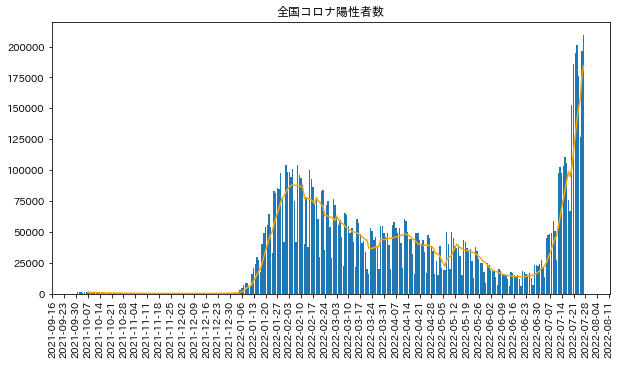

In [4]:
#PREF = 'Toyama'
#PREF_TITLE = '富山県'
PREF = 'ALL'
PREF_TITLE = '全国'
df_pref = df[['Date',PREF]]
df_pref.columns = ['ds', 'y']
df_pref = df_pref[df_pref['ds'] >= dt.datetime(2021,10,1)]

plotgraph()

In [ ]:
PREF = 'Toyama'
PREF_TITLE = '富山県'
df_pref = df[['Date',PREF]]
df_pref.columns = ['ds', 'y']
df_pref = df_pref[df_pref['ds'] >= dt.datetime(2021,10,1)]

plotgraph()

2022/04/26
新規陽性者数 148
前日比 -183
7日間平均 313


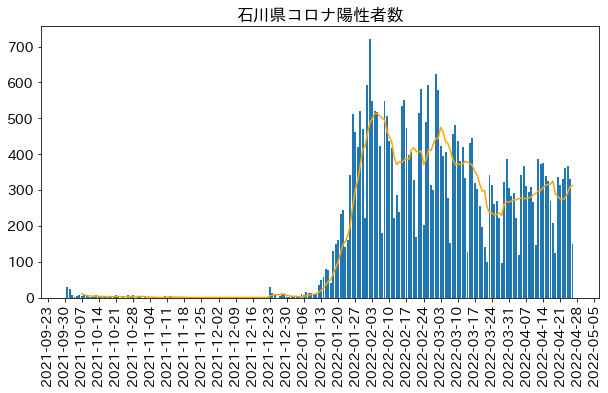

In [6]:
PREF = 'Ishikawa'
PREF_TITLE = '石川県'
df_pref = df[['Date',PREF]]
df_pref.columns = ['ds', 'y']
df_pref = df_pref[df_pref['ds'] >= dt.datetime(2021,10,1)]

plotgraph()